In [1]:
import math
import collections
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.options.display.max_rows = 10

In [3]:
path = os.getcwd()
path

'C:\\Users\\Nasim\\Documents\\Heriot Watt Uni\\Dissertation\\Analysis'

In [16]:
incident_df = pd.read_csv('incident_df_hl.csv')

In [17]:
incident_df = incident_df.loc[(incident_df['RELEASE_TYPE'] == 'RUPTURE')]

In [18]:
incident_df

,IYEAR,DATAFILE_AS_OF,SIGNIFICANT,SERIOUS,IPE,IA_IPE,OM_IPE,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_RECEIVED_DATE,...,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE,CP_Types,Installation_Decade,Diameter_Range,SMYS_Cat,ign_expl
0,2010,2021-11-30 10:26:05,YES,NO,NO,NO,NO,20100008.0,19253.0,2010-03-22 09:49:07,...,NEAL JONES,COMPLIANCE COORDINATOR,580-395-6304,neal.jones@oneok.com,OPERATOR WAS ISOLATING PIPELINE GATHERING SYST...,NaN,1970s,10<d<=20,Greater than 20%,Not Ignited
1,2010,2021-11-30 10:26:05,YES,NO,YES,YES,NO,20100021.0,17161.0,2010-04-02 10:25:27,...,DAVID STAFFORD,MANAGER PIPELINE COMPLIANCE,715-394-1567,david.stafford@enbridge.com,"ON JANUARY 8, 2010 AT 23:38 LOCAL TIME, THE EN...",NaN,1950s,20<d<=28,Greater than 20%,Not Ignited
9,2010,2021-11-30 10:26:05,YES,NO,NO,NO,NO,20100083.0,16118.0,2010-05-18 11:42:54,...,JOHN S. STERRETT,STAFF ENGINEER,713-381-2493,jsterrett@eprod.com,SCADA LOW PRESSURE ALARM AT A PUMP STATION ALE...,NaN,1960s,4<d<=10,Greater than 20%,Not Ignited
20,2010,2021-11-30 10:26:05,YES,NO,YES,YES,NO,20100130.0,19913.0,2010-06-29 17:13:19,...,ROB KNANISHU,DOT COMPLIANCE ADVISOR TEAM LEADER,630-420-5519,rob.knanishu@bp.com,AN IN-SERVICE FAILURE OCCURRED ON THE WHITING ...,NaN,1950s,10<d<=20,Greater than 20%,Not Ignited
21,2010,2021-11-30 10:26:05,YES,NO,NO,NO,NO,20100133.0,18225.0,2010-06-30 09:56:47,...,TODD TULLIO,REGULATORY COMPLIANCE MANAGER,832-379-6255,todd.l.tullio@conocophillips.com,THE MX20 PIPELINE RUPTURED RELEASING NATURAL G...,CPC,1940s,4<d<=10,Greater than 20%,Not Ignited
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,2019,2021-11-30 10:26:05,YES,NO,YES,YES,NO,20190359.0,33676.0,2019-11-26 17:20:15,...,LEE ROMACK,DIRECTOR PIPELINES REGULATORY COMPLIANCE,832-320-5315,lee_romack@tcenergy.com,"ON 29 OCTOBER, 2019, AT 21:52 HRS CDT, A PRESS...",NaN,2000s,28<d,Greater than 20%,Not Ignited
668,2019,2021-11-30 10:26:05,NO,NO,YES,YES,NO,20190392.0,33325.0,2019-12-19 14:52:34,...,DEBOARH PRICE,INTEGRITY AND REGULATORY SERVICES MANAGER,832-762-2553,deborah.price@shell.com,LOPC 8M68 PURGING LINE LEAKS:CREWS WERE IN THE...,CUC,Pre 1940,4<d<=10,Less than 20%,Not Ignited
672,2020,2021-11-30 10:26:05,YES,NO,NO,NO,NO,20200051.0,33824.0,2020-02-20 10:16:53,...,HANS DEEB,SR. PIPELINE COMPLIANCE ENGINEER,713-381-4277,hdeeb@eprod.com,ON 01/26/2020 AT 18:24 CST PIPELINE CONTROL OB...,NaN,1960s,4<d<=10,Greater than 20%,Not Ignited
709,2020,2021-11-30 10:26:05,YES,NO,YES,YES,NO,20200340.0,35372.0,2020-12-29 14:15:26,...,GRACE RIESS,SUPERVISOR INTEGRITY MANAGEMENT,918-574-7165,grace.riess@magellanlp.com,"AT 5:17 (RMT) ON DECEMBER 4, 2020 THE MAGELLAN...",CPC,1960s,4<d<=10,Greater than 20%,Not Ignited


In [9]:
mileage_df = pd.read_csv('mileage_df_hl.csv')

In [10]:
mileage_df = mileage_df.set_index('Year')

In [11]:
mileage_df.index

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='Year')

In [19]:
#calculating rupture rates pipelines (no attributes)
incident_total = pd.DataFrame()

#Total incidents
for n in range(0, 11):
    incident_total = incident_total.append({'Year': int(2010+n), 'Total': len(incident_df.loc[incident_df['IYEAR'] == 2010+n]), 
                                            'Excavation Damage': len(incident_df.loc[(incident_df['MAP_CAUSE'] == 'EXCAVATION DAMAGE') & (incident_df['IYEAR'] == 2010+n)]), 
                                           'Corrosion': len(incident_df.loc[(incident_df['MAP_CAUSE'] == 'CORROSION') & (incident_df['IYEAR'] == 2010+n)]), 
                                           'Incorrect Operations': len(incident_df.loc[(incident_df['MAP_CAUSE'] == 'INCORRECT OPERATION') & (incident_df['IYEAR'] == 2010+n)]), 
                                           'All Other Causes': len(incident_df.loc[(incident_df['MAP_CAUSE'] == 'ALL OTHER CAUSES') & (incident_df['IYEAR'] == 2010+n)]), 
                                           'Material Failure': len(incident_df.loc[(incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') & (incident_df['IYEAR'] == 2010+n)]), 
                                            'Natural Force Damage': len(incident_df.loc[(incident_df['MAP_CAUSE'] == 'NATURAL FORCE DAMAGE') & (incident_df['IYEAR'] == 2010+n)]), 
                                           'Other Outside Forces': len(incident_df.loc[(incident_df['MAP_CAUSE'] == 'OTHER OUTSIDE FORCE DAMAGE') & (incident_df['IYEAR'] == 2010+n)]),}, ignore_index=True) 


In [20]:
incident_total = incident_total.set_index('Year')

In [21]:
incident_total['Total_rate'] = incident_total['Total']/mileage_df['PARTDONTOTAL']
incident_total['All Other Causes_rate'] = incident_total['All Other Causes']/mileage_df['PARTDONTOTAL']
incident_total['Corrosion_rate'] = incident_total['Corrosion']/mileage_df['PARTDONTOTAL']
incident_total['Excavation Damage_rate'] = incident_total['Excavation Damage']/mileage_df['PARTDONTOTAL']

incident_total['Incorrect Operations_rate'] = incident_total['Incorrect Operations']/mileage_df['PARTDONTOTAL']
incident_total['Material Failure_rate'] = incident_total['Material Failure']/mileage_df['PARTDONTOTAL']

incident_total['Natural Force Damage_rate'] = incident_total['Natural Force Damage']/mileage_df['PARTDONTOTAL']
incident_total['Other Outside Forces_rate'] = incident_total['Other Outside Forces']/mileage_df['PARTDONTOTAL']

In [22]:
incident_total_average = incident_total.mean(0)

In [23]:
incident_total_average.index

Index(['All Other Causes', 'Corrosion', 'Excavation Damage',
       'Incorrect Operations', 'Material Failure', 'Natural Force Damage',
       'Other Outside Forces', 'Total', 'Total_rate', 'All Other Causes_rate',
       'Corrosion_rate', 'Excavation Damage_rate', 'Incorrect Operations_rate',
       'Material Failure_rate', 'Natural Force Damage_rate',
       'Other Outside Forces_rate'],
      dtype='object')

In [33]:
incident_total[['All Other Causes_rate',
       'Corrosion_rate', 'Excavation Damage_rate', 'Incorrect Operations_rate',
       'Material Failure_rate', 'Natural Force Damage_rate',
       'Other Outside Forces_rate']]

,All Other Causes_rate,Corrosion_rate,Excavation Damage_rate,Incorrect Operations_rate,Material Failure_rate,Natural Force Damage_rate,Other Outside Forces_rate
Year,,,,,,,
2010.0,0.0,0.000007,0.000004,0.000007,0.000011,0.000000,0.000000
2011.0,0.0,0.000000,0.000003,0.000000,0.000003,0.000003,0.000000
2012.0,0.0,0.000007,0.000003,0.000003,0.000017,0.000003,0.000000
2013.0,0.0,0.000007,0.000000,0.000000,0.000010,0.000003,0.000000
2014.0,0.0,0.000000,0.000000,0.000003,0.000006,0.000000,0.000003
...,...,...,...,...,...,...,...
2016.0,0.0,0.000000,0.000003,0.000000,0.000015,0.000000,0.000000
2017.0,0.0,0.000003,0.000003,0.000000,0.000003,0.000000,0.000000
2018.0,0.0,0.000006,0.000006,0.000003,0.000006,0.000003,0.000003


In [95]:
incident_total_average[['Excavation Damage_rate', 'Corrosion_rate', 'Material Failure_rate', 
                        'Natural Force Damage_rate', 'Other Outside Forces_rate', 'Incorrect Operations_rate', 
                        'All Other Causes_rate']]

Excavation Damage_rate       2.802916e-06
Corrosion_rate               3.982424e-06
Material Failure_rate        8.097935e-06
Natural Force Damage_rate    1.193279e-06
Other Outside Forces_rate    5.540620e-07
Incorrect Operations_rate    1.505333e-06
All Other Causes_rate        0.000000e+00
dtype: float64

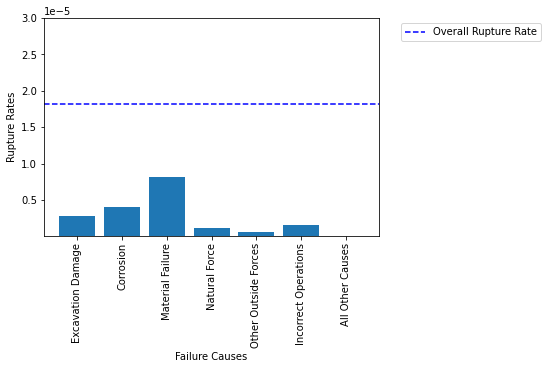

In [96]:
#Stacked bar graph

windth = 10
fig, ax = plt.subplots()

labels = ['Excavation Damage', 'Corrosion', 'Material Failure', 
                        'Natural Force', 'Other Outside Forces', 'Incorrect Operations', 
                        'All Other Causes']

values = incident_total_average[['Excavation Damage_rate', 'Corrosion_rate', 'Material Failure_rate', 
                        'Natural Force Damage_rate', 'Other Outside Forces_rate', 'Incorrect Operations_rate', 
                        'All Other Causes_rate']]

a = ax.bar(labels, values.values , align = 'center' ) 
b = ax.axhline(y=incident_total_average['Total_rate'] , color='b', linestyle='--')

b.set_label('Overall Rupture Rate')

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Failure Causes') 


#y-axis labels 
plt.ylabel('Rupture Rates') 
plt.ylim(bottom = 0.0000001, top=0.00003)
plt.ticklabel_format(axis= 'y', style = 'sci', scilimits=(0,0))


#plot title 
#plt.title('Ditribution of Incidents by Installation Year') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#plt.xticks(rotation=90)  
#for n in a:
   #height = n.get_height()
   #plt.text(x=n.get_x() + n.get_width() / 2, y=height, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\HL Rates Plots\\Total_rates'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [26]:
incident_total_average['Total_rate']

1.8135948130038746e-05

In [34]:
#calculating rupture rates based on cp
incident_cp = pd.DataFrame()

#Total incidents
for n in range(0, 11):
    incident_cp= incident_cp.append({'Year': 2010+n, 'CPC': len(incident_df.loc[(incident_df['CP_Types'] == 'CPC') & (incident_df['IYEAR'] == 2010+n)]), 
                                            'CPB': len(incident_df.loc[(incident_df['CP_Types'] == 'CPB') & (incident_df['IYEAR'] == 2010+n)]), 
                                           'CUC': len(incident_df.loc[(incident_df['CP_Types'] == 'CUC') & (incident_df['IYEAR'] == 2010+n)]), 
                                           'CUB': len(incident_df.loc[(incident_df['CP_Types'] == 'CUB') & (incident_df['IYEAR'] == 2010+n)])}, ignore_index=True) 


In [35]:
incident_cp = incident_cp.set_index('Year')

In [37]:
incident_cp['CPC_rate'] = incident_cp['CPC']/mileage_df['PARTDONCPC']
incident_cp['CPB_rate'] = incident_cp['CPB']/mileage_df['PARTDONCPB']
incident_cp['CUC_rate'] = incident_cp['CUC']/mileage_df['PARTDONCUC']
incident_cp['CUB_rate'] = incident_cp['CUB']/mileage_df['PARTDONCUB']

In [38]:
incident_cp_average = incident_cp.mean(0)

In [73]:
incident_cp_average

CPB         0.000000
CPC         1.090909
CUB         0.000000
CUC         0.090909
CPC_rate    0.000003
CPB_rate    0.000000
CUC_rate    0.000055
CUB_rate    0.000000
dtype: float64

In [39]:
incident_cp_average[['CPC_rate', 'CPB_rate', 'CUC_rate','CUB_rate']]

Index(['CPB', 'CPC', 'CUB', 'CUC', 'CPC_rate', 'CPB_rate', 'CUC_rate',
       'CUB_rate'],
      dtype='object')

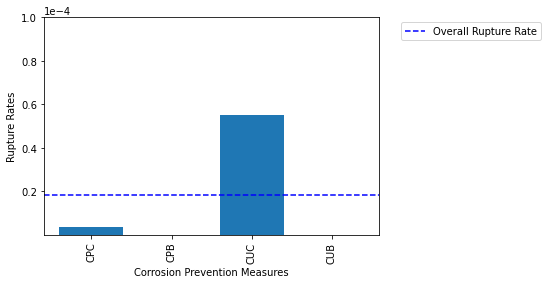

In [97]:
#Stacked bar graph

windth = 10
fig, ax = plt.subplots()

labels = ['CPC', 'CPB', 'CUC','CUB']

values = incident_cp_average[['CPC_rate', 'CPB_rate', 'CUC_rate','CUB_rate']]

a = ax.bar(labels, values.values , align = 'center' ) 
b = ax.axhline(y=incident_total_average['Total_rate'] , color='b', linestyle='--')

b.set_label('Overall Rupture Rate')

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Corrosion Prevention Measures') 


#y-axis labels 
plt.ylabel('Rupture Rates') 
plt.ylim(bottom = 0.0000001, top=0.0001)
plt.ticklabel_format(axis= 'y', style = 'sci', scilimits=(0,0))


#plot title 
#plt.title('Ditribution of Incidents by Installation Year') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#plt.xticks(rotation=90)  
#for n in a:
   #height = n.get_height()
   #plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\HL Rates Plots\\cp_rates'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [43]:
#calculating rupture rates based on installation decade
incident_installation = pd.DataFrame()

#Total incidents
for n in range(0, 11):
    incident_installation= incident_installation.append({'Year': 2010+n, 'Pre 1940': len(incident_df.loc[(incident_df['Installation_Decade'] == 'Pre 1940') & (incident_df['IYEAR'] == 2010+n)]), 
                                            '1940s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1940s') & (incident_df['IYEAR'] == 2010+n)]), 
                                           '1950s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1950s') & (incident_df['IYEAR'] == 2010+n)]), 
                                           '1960s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1960s') & (incident_df['IYEAR'] == 2010+n)]), 
                                            '1970s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1970s') & (incident_df['IYEAR'] == 2010+n)]), 
                                            '1980s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1980s') & (incident_df['IYEAR'] == 2010+n)]), 
                                            '1990s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1990s') & (incident_df['IYEAR'] == 2010+n)]), 
                                            '2000s': len(incident_df.loc[(incident_df['Installation_Decade'] == '2000s') & (incident_df['IYEAR'] == 2010+n)]), 
                                            '2010s': len(incident_df.loc[(incident_df['Installation_Decade'] == '2010s') & (incident_df['IYEAR'] == 2010+n)])}, ignore_index=True) 


In [74]:
#calculating rupture rates based on installation decade for corrosion and material causes only
incident_installation_corr_mat = pd.DataFrame()

#Total incidents
for n in range(0, 11):
    incident_installation_corr_mat= incident_installation_corr_mat.append({'Year': 2010+n, 
                                                                           'Pre 1940': len(incident_df.loc[(incident_df['Installation_Decade'] == 'Pre 1940') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                            '1940s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1940s') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                           '1950s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1950s') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                           '1960s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1960s') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                            '1970s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1970s') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                            '1980s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1980s') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                            '1990s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1990s') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                            '2000s': len(incident_df.loc[(incident_df['Installation_Decade'] == '2000s') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                            '2010s': len(incident_df.loc[(incident_df['Installation_Decade'] == '2010s') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)])}, ignore_index=True) 


In [44]:
incident_installation = incident_installation.set_index('Year')

In [75]:
incident_installation_corr_mat = incident_installation_corr_mat.set_index('Year')

In [58]:
incident_installation['Pre 1940_rate'] = incident_installation['Pre 1940']/(mileage_df['PARTI192029']+mileage_df['PARTI193039']+mileage_df['PARTIPRE20'])
incident_installation['1940s_rate'] = incident_installation['1940s']/mileage_df['PARTI194049']
incident_installation['1950s_rate'] = incident_installation['1950s']/mileage_df['PARTI195059']
incident_installation['1960s_rate'] = incident_installation['1960s']/mileage_df['PARTI196069']
incident_installation['1970s_rate'] = incident_installation['1970s']/mileage_df['PARTI197079']
incident_installation['1980s_rate'] = incident_installation['1980s']/mileage_df['PARTI198089']
incident_installation['1990s_rate'] = incident_installation['1990s']/mileage_df['PARTI199099']
incident_installation['2000s_rate'] = incident_installation['2000s']/mileage_df['PARTI200009']
incident_installation['2010s_rate'] = incident_installation['2010s']/mileage_df['PARTI201019']

In [77]:
incident_installation_corr_mat['Pre 1940_rate'] = incident_installation_corr_mat['Pre 1940']/(mileage_df['PARTI192029']+mileage_df['PARTI193039']+mileage_df['PARTIPRE20'])
incident_installation_corr_mat['1940s_rate'] = incident_installation_corr_mat['1940s']/mileage_df['PARTI194049']
incident_installation_corr_mat['1950s_rate'] = incident_installation_corr_mat['1950s']/mileage_df['PARTI195059']
incident_installation_corr_mat['1960s_rate'] = incident_installation_corr_mat['1960s']/mileage_df['PARTI196069']
incident_installation_corr_mat['1970s_rate'] = incident_installation_corr_mat['1970s']/mileage_df['PARTI197079']
incident_installation_corr_mat['1980s_rate'] = incident_installation_corr_mat['1980s']/mileage_df['PARTI198089']
incident_installation_corr_mat['1990s_rate'] = incident_installation_corr_mat['1990s']/mileage_df['PARTI199099']
incident_installation_corr_mat['2000s_rate'] = incident_installation_corr_mat['2000s']/mileage_df['PARTI200009']
incident_installation_corr_mat['2010s_rate'] = incident_installation_corr_mat['2010s']/mileage_df['PARTI201019']

In [59]:
incident_installation_average = incident_installation.mean(0)

In [78]:
incident_installation_corr_mat_average = incident_installation_corr_mat.mean(0)

In [60]:
incident_installation_average.index

Index(['1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s',
       'Pre 1940', 'Pre 1940_rate', '1940s_rate', '1950s_rate', '1960s_rate',
       '1970s_rate', '1980s_rate', '1990s_rate', '2000s_rate', '2010s_rate'],
      dtype='object')

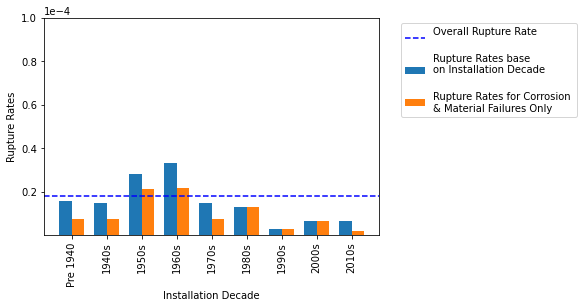

In [98]:
#Stacked bar graph

n = len(['Pre 1940', '1940s', '1950s', '1960s',
       '1970s', '1980s', '1990s', '2000s', '2010s'])
x = np.arange(n)  # the label locations
width = 0.35

fig, ax = plt.subplots()

labels = ['Pre 1940', '1940s', '1950s', '1960s',
       '1970s', '1980s', '1990s', '2000s', '2010s']

values = incident_installation_average[['Pre 1940_rate', '1940s_rate', '1950s_rate', '1960s_rate',
       '1970s_rate', '1980s_rate', '1990s_rate', '2000s_rate', '2010s_rate']]
values_corr_mat = incident_installation_corr_mat_average[['Pre 1940_rate', '1940s_rate', '1950s_rate', '1960s_rate',
       '1970s_rate', '1980s_rate', '1990s_rate', '2000s_rate', '2010s_rate']]

a = ax.bar(x, values.values , width ) 
b = ax.axhline(y=incident_total_average['Total_rate'] , color='b', linestyle='--')
c = ax.bar(x + width, values_corr_mat.values , width ) 

b.set_label('Overall Rupture Rate\n')
a.set_label('Rupture Rates base \non Installation Decade\n')
c.set_label('Rupture Rates for Corrosion \n& Material Failures Only')

#xticks 
#plt.xticks(rotation=90) 
plt.xticks(x + width/2, labels, rotation = 90)

#x-axis labels 
plt.xlabel('Installation Decade') 


#y-axis labels 
plt.ylabel('Rupture Rates') 
plt.ylim(bottom = 0.0000001, top=0.0001)
plt.ticklabel_format(axis= 'y', style = 'sci', scilimits=(0,0))


#plot title 
#plt.title('Ditribution of Incidents by Installation Year') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#plt.xticks(rotation=90)  
#for n in a:
   #height = n.get_height()
   #plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\HL Rates Plots\\installation_rates'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [92]:
incident_installation_average[['Pre 1940_rate', '1940s_rate', '1950s_rate', '1960s_rate',
       '1970s_rate', '1980s_rate', '1990s_rate', '2000s_rate', '2010s_rate']]

Pre 1940_rate    0.000016
1940s_rate       0.000015
1950s_rate       0.000028
1960s_rate       0.000033
1970s_rate       0.000015
1980s_rate       0.000013
1990s_rate       0.000003
2000s_rate       0.000007
2010s_rate       0.000007
dtype: float64

In [50]:
#calculating rupture rates based on diameter
incident_diameter = pd.DataFrame()

#Total incidents
for n in range(0, 11):
    incident_diameter= incident_diameter.append({'Year': 2010+n, 'd<=4': len(incident_df.loc[(incident_df['Diameter_Range'] == 'd<=4') & (incident_df['IYEAR'] == 2010+n)]), 
                                            '4<d<=10': len(incident_df.loc[(incident_df['Diameter_Range'] == '4<d<=10') & (incident_df['IYEAR'] == 2010+n)]), 
                                           '10<d<=20': len(incident_df.loc[(incident_df['Diameter_Range'] == '10<d<=20') & (incident_df['IYEAR'] == 2010+n)]), 
                                           '20<d<=28': len(incident_df.loc[(incident_df['Diameter_Range'] == '20<d<=28') & (incident_df['IYEAR'] == 2010+n)]), 
                                                '28<d': len(incident_df.loc[(incident_df['Diameter_Range'] == '28<d') & (incident_df['IYEAR'] == 2010+n)])}, ignore_index=True) 


In [51]:
incident_diameter = incident_diameter.set_index('Year')

In [52]:
incident_diameter['d<=4_rate'] = incident_diameter['d<=4']/mileage_df['d<=4']
incident_diameter['4<d<=10_rate'] = incident_diameter['4<d<=10']/mileage_df['4<d<=10']
incident_diameter['10<d<=20_rate'] = incident_diameter['10<d<=20']/mileage_df['10<d<=20']
incident_diameter['20<d<=28_rate'] = incident_diameter['20<d<=28']/mileage_df['20<d<=28']
incident_diameter['28<d_rate'] = incident_diameter['28<d']/mileage_df['28<d']

In [53]:
incident_diameter_average = incident_diameter.mean(0)

In [54]:
incident_diameter_average.index

Index(['10<d<=20', '20<d<=28', '28<d', '4<d<=10', 'd<=4', 'd<=4_rate',
       '4<d<=10_rate', '10<d<=20_rate', '20<d<=28_rate', '28<d_rate'],
      dtype='object')

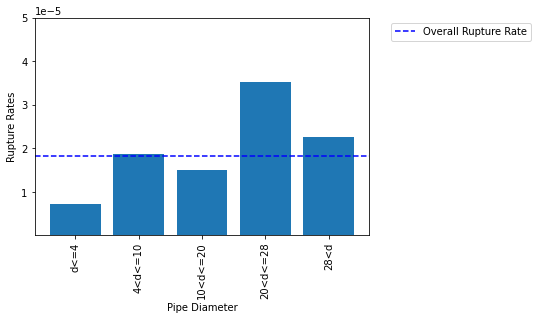

In [99]:
#Stacked bar graph

windth = 10
fig, ax = plt.subplots()

labels = ['d<=4',
       '4<d<=10', '10<d<=20', '20<d<=28', '28<d']

values = incident_diameter_average[['d<=4_rate',
       '4<d<=10_rate', '10<d<=20_rate', '20<d<=28_rate', '28<d_rate']]

a = ax.bar(labels, values.values , align = 'center' ) 
b = ax.axhline(y=incident_total_average['Total_rate'] , color='b', linestyle='--')

b.set_label('Overall Rupture Rate')

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Pipe Diameter') 


#y-axis labels 
plt.ylabel('Rupture Rates') 
plt.ylim(bottom = 0.0000001, top=0.00005)
plt.ticklabel_format(axis= 'y', style = 'sci', scilimits=(0,0))


#plot title 
#plt.title('Ditribution of Incidents by Installation Year') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#plt.xticks(rotation=90)  
#for n in a:
   #height = n.get_height()
   #plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\HL Rates Plots\\diameter_rates'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [93]:
incident_diameter_average[['d<=4_rate',
       '4<d<=10_rate', '10<d<=20_rate', '20<d<=28_rate', '28<d_rate']]

d<=4_rate        0.000007
4<d<=10_rate     0.000019
10<d<=20_rate    0.000015
20<d<=28_rate    0.000035
28<d_rate        0.000022
dtype: float64

In [56]:
#calculating rupture rates based on smys
incident_smys = pd.DataFrame()

#Total incidents
for n in range(0, 11):
    incident_smys= incident_smys.append({'Year': 2010+n, 'Less than 20%': len(incident_df.loc[(incident_df['SMYS_Cat'] == 'Less than 20%') & (incident_df['IYEAR'] == 2010+n)]), 
                                            'Greater than 20%': len(incident_df.loc[(incident_df['SMYS_Cat'] == 'Greater than 20%') & (incident_df['IYEAR'] == 2010+n)])}, ignore_index=True) 


In [80]:
#calculating rupture rates based on smys for corrosion and material causes only
incident_smys_corr_mat = pd.DataFrame()

#Total incidents
for n in range(0, 11):
    incident_smys_corr_mat= incident_smys_corr_mat.append({'Year': 2010+n, 
                                                           'Less than 20%': len(incident_df.loc[(incident_df['SMYS_Cat'] == 'Less than 20%') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                            'Greater than 20%': len(incident_df.loc[(incident_df['SMYS_Cat'] == 'Greater than 20%') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)])}, ignore_index=True) 


In [57]:
incident_smys = incident_smys.set_index('Year')

In [81]:
incident_smys_corr_mat = incident_smys_corr_mat.set_index('Year')

In [62]:
incident_smys['Less than 20%_rate'] = incident_smys['Less than 20%']/mileage_df['LessThan20OnTotal']
incident_smys['Greater than 20%_rate'] = incident_smys['Greater than 20%']/mileage_df['PARTJST20MOREON']

In [86]:
mileage_df['LessThan20OnTotal'].mean(0)

9767.350733818183

In [87]:
mileage_df['PARTJST20MOREON'].mean(0)

309627.6677636364

In [82]:
incident_smys_corr_mat['Less than 20%_rate'] = incident_smys_corr_mat['Less than 20%']/mileage_df['LessThan20OnTotal']
incident_smys_corr_mat['Greater than 20%_rate'] = incident_smys_corr_mat['Greater than 20%']/mileage_df['PARTJST20MOREON']

In [63]:
incident_smys_average = incident_smys.mean(0)

In [83]:
incident_smys_corr_mat_average = incident_smys_corr_mat.mean(0)

In [64]:
incident_smys_average.index

Index(['Greater than 20%', 'Less than 20%', 'Less than 20%_rate',
       'Greater than 20%_rate'],
      dtype='object')

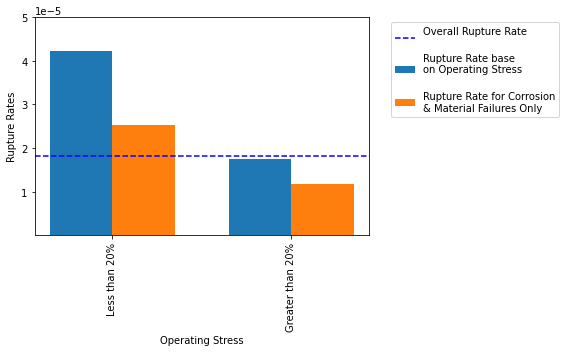

In [100]:
#Stacked bar graph

n = len(['Less than 20%_rate','Greater than 20%_rate'])
x = np.arange(n)  # the label locations
width = 0.35
fig, ax = plt.subplots()

labels = ['Less than 20%', 'Greater than 20%']

values = incident_smys_average[['Less than 20%_rate','Greater than 20%_rate']]
values_corr_mat = incident_smys_corr_mat_average[['Less than 20%_rate','Greater than 20%_rate']]

a = ax.bar(x, values.values , width ) 
b = ax.axhline(y=incident_total_average['Total_rate'] , color='b', linestyle='--')
c = ax.bar(x +width , values_corr_mat.values , width ) 

b.set_label('Overall Rupture Rate\n')
a.set_label('Rupture Rate base\non Operating Stress\n')
c.set_label('Rupture Rate for Corrosion\n& Material Failures Only')

#xticks 
#plt.xticks(rotation=90) 
plt.xticks(x + width/2, labels, rotation=90) 

#x-axis labels 
plt.xlabel('Operating Stress') 


#y-axis labels 
plt.ylabel('Rupture Rates') 
plt.ylim(bottom = 0.0000001, top=0.00005)
plt.ticklabel_format(axis= 'y', style = 'sci', scilimits=(0,0))


#plot title 
#plt.title('Ditribution of Incidents by Installation Year') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#plt.xticks(rotation=90)  
#for n in a:
   #height = n.get_height()
   #plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\HL Rates Plots\\smys_rates'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [94]:
incident_smys_average[['Less than 20%_rate','Greater than 20%_rate']]

Less than 20%_rate       0.000042
Greater than 20%_rate    0.000017
dtype: float64

In [66]:
#calculating rupture rates based on commodity
incident_commodity = pd.DataFrame()

#Total incidents
for n in range(0, 11):
    incident_commodity= incident_commodity.append({'Year': 2010+n, 
                                                   'Crude Oil': len(incident_df.loc[(incident_df['COMMODITY_RELEASED_TYPE'] == 'CRUDE OIL') & (incident_df['IYEAR'] == 2010+n)]),
                                                   'HVL': len(incident_df.loc[(incident_df['COMMODITY_RELEASED_TYPE'] == 'HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS A GAS AT AMBIENT CONDITIONS') & (incident_df['IYEAR'] == 2010+n)]), 
                                                   'CO2': len(incident_df.loc[(incident_df['COMMODITY_RELEASED_TYPE'] == 'CO2 (CARBON DIOXIDE)') & (incident_df['IYEAR'] == 2010+n)]), 
                                            'Refined Products': len(incident_df.loc[(incident_df['COMMODITY_RELEASED_TYPE'] == 'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHICH IS A LIQUID AT AMBIENT CONDITIONS') & (incident_df['IYEAR'] == 2010+n)])}, ignore_index=True) 


In [67]:
incident_commodity = incident_commodity.set_index('Year')

In [68]:
incident_commodity['Crude Oil_rate'] = incident_commodity['Crude Oil']/mileage_df['Crude Oil']
incident_commodity['Refined Products_rate'] = incident_commodity['Refined Products']/mileage_df['Refined and/or Petroleum Product (non-HVL)']
incident_commodity['CO2_rate'] = incident_commodity['CO2']/mileage_df['CO2']
incident_commodity['HVL_rate'] = incident_commodity['HVL']/mileage_df['HVL']

In [69]:
incident_commodity_average = incident_commodity.mean(0)
incident_commodity_average

CO2                      0.090909
Crude Oil                2.181818
HVL                      1.909091
Refined Products         1.545455
Crude Oil_rate           0.000021
Refined Products_rate    0.000015
CO2_rate                 0.000011
HVL_rate                 0.000018
dtype: float64

In [70]:
incident_commodity_average.index

Index(['CO2', 'Crude Oil', 'HVL', 'Refined Products', 'Crude Oil_rate',
       'Refined Products_rate', 'CO2_rate', 'HVL_rate'],
      dtype='object')

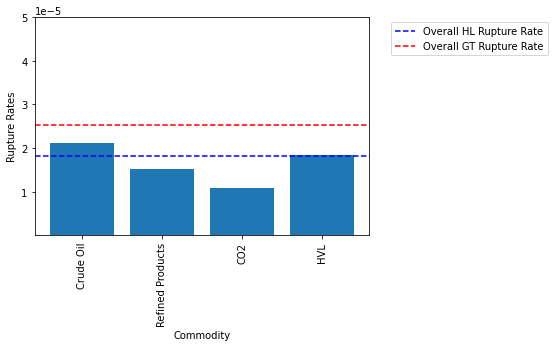

In [101]:
#Stacked bar graph

windth = 10
fig, ax = plt.subplots()

labels = ['Crude Oil',
       'Refined Products', 'CO2', 'HVL']

values = incident_commodity_average[['Crude Oil_rate',
       'Refined Products_rate', 'CO2_rate', 'HVL_rate']]

incident_total_average_gt = 2.5321106046177225e-05

a = ax.bar(labels, values.values , align = 'center' ) 
b = ax.axhline(y=incident_total_average['Total_rate'] , color='b', linestyle='--')
c = ax.axhline(y=incident_total_average_gt , color='r', linestyle='--')

b.set_label('Overall HL Rupture Rate')
c.set_label('Overall GT Rupture Rate')

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Commodity') 


#y-axis labels 
plt.ylabel('Rupture Rates') 
plt.ylim(bottom = 0.0000001, top=0.00005)
plt.ticklabel_format(axis= 'y', style = 'sci', scilimits=(0,0))


#plot title 
#plt.title('Ditribution of Incidents by Installation Year') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#plt.xticks(rotation=90)  
#for n in a:
   #height = n.get_height()
   #plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\HL Rates Plots\\commodity_rates'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [91]:
incident_commodity_average

CO2                      0.090909
Crude Oil                2.181818
HVL                      1.909091
Refined Products         1.545455
Crude Oil_rate           0.000021
Refined Products_rate    0.000015
CO2_rate                 0.000011
HVL_rate                 0.000018
dtype: float64